# NAJAH 

# import libraries

In [28]:
!pip install -U scikit-learn

  Using cached scikit_learn-0.24.1-cp38-cp38-win_amd64.whl (6.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\ACA-Ahmed\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [29]:
import pandas as pd                                               #to read excel files and deal with dataframes
import numpy as np                                                #to deal with arrays 
from sklearn.model_selection import train_test_split              #to split data
from sklearn.preprocessing import LabelEncoder                    #to encode data 
%matplotlib inline
import matplotlib.pyplot as plt                                   #to plot data
import seaborn as sns                                             #to plot data
#from sklearn.preprocessing import Normalizer                      #to normalize data

In [30]:
#load dataset
path = 'Najah.xlsx'
data = pd.read_excel(path)

In [31]:
#display data
data.head(n=10)

,Timestamp,نوع المشروع؟,رأس المال,هل يوجد منافسين؟,هل مشروعك؟,عدد الموظفين المحتمل,هل مشروعك يوجد به شركاء؟,هل يوجد خطط للمخاطر ؟,كم المبلغ للمخاطر ؟,هل يوجد ممول للمشروع؟,هل تم اللجوء فقط الي التمويل ؟,هل مشروعك
0,2021-02-16 15:09:18.654,كافيه,10000-50000,نعم,علي ارض الواقع,10 وأقل,نعم,لا,5000 - 10000,لا,لا,فشل
1,2021-02-17 14:45:44.029,كماليات,10000-50000,نعم,علي ارض الواقع,10 وأقل,لا,لا,5000 - 10000,نعم,نعم,نجح
2,2021-02-17 14:46:15.394,مطعم,100000 - 500000,نعم,علي ارض الواقع,30 وأقل,لا,نعم,اكثر من 15000,نعم,لا,نجح
3,2021-02-17 14:47:12.636,ملابس,100000 - 500000,نعم,علي ارض الواقع,20 وأقل,نعم,نعم,10000 - 15000,نعم,نعم,نجح
4,2021-02-17 14:48:04.255,كافيه,10000-50000,لا,علي ارض الواقع,10 وأقل,لا,نعم,5000 - 10000,لا,لا,فشل
5,2021-02-17 14:48:56.221,هدايا,10000-50000,نعم,اونلاين,10 وأقل,لا,لا,5000 - 10000,لا,لا,نجح
6,2021-02-17 14:49:19.921,هدايا,10000-50000,نعم,اونلاين,10 وأقل,نعم,نعم,10000 - 15000,نعم,لا,نجح
7,2021-02-17 14:49:48.571,كماليات,60000 - 100000,نعم,اونلاين,10 وأقل,نعم,نعم,10000 - 15000,نعم,لا,نجح
8,2021-02-17 14:51:41.165,كافيه,10000-50000,نعم,علي ارض الواقع,10 وأقل,لا,لا,5000 - 10000,لا,لا,فشل
9,2021-02-17 14:54:07.446,مطعم,10000-50000,نعم,علي ارض الواقع,10 وأقل,لا,لا,5000 - 10000,لا,نعم,فشل


# Data PreProcessing 

In [32]:
#delete unusful data
data = data.drop(['Timestamp'], axis=1)
data.head()

,نوع المشروع؟,رأس المال,هل يوجد منافسين؟,هل مشروعك؟,عدد الموظفين المحتمل,هل مشروعك يوجد به شركاء؟,هل يوجد خطط للمخاطر ؟,كم المبلغ للمخاطر ؟,هل يوجد ممول للمشروع؟,هل تم اللجوء فقط الي التمويل ؟,هل مشروعك
0,كافيه,10000-50000,نعم,علي ارض الواقع,10 وأقل,نعم,لا,5000 - 10000,لا,لا,فشل
1,كماليات,10000-50000,نعم,علي ارض الواقع,10 وأقل,لا,لا,5000 - 10000,نعم,نعم,نجح
2,مطعم,100000 - 500000,نعم,علي ارض الواقع,30 وأقل,لا,نعم,اكثر من 15000,نعم,لا,نجح
3,ملابس,100000 - 500000,نعم,علي ارض الواقع,20 وأقل,نعم,نعم,10000 - 15000,نعم,نعم,نجح
4,كافيه,10000-50000,لا,علي ارض الواقع,10 وأقل,لا,نعم,5000 - 10000,لا,لا,فشل


In [33]:
#display unique values to each column
print(":نوع المشروع")
print(np.unique(data['نوع المشروع؟']))
print('--------------------------------------------------------')
print(":رأس المال")
print(np.unique(data['رأس المال']))
print('--------------------------------------------------------')
print(":هل يوجد منافسين؟")
print(np.unique(data['هل يوجد منافسين؟']))
print('--------------------------------------------------------')
print(":هل مشروعك؟")
print(np.unique(data['هل مشروعك؟']))
print('--------------------------------------------------------')
print(":عدد الموظفين المحتمل")
print(np.unique(data['عدد الموظفين المحتمل ']))
print('--------------------------------------------------------')
print(":هل مشروعك يوجد به شركاء؟")
print(np.unique(data['هل مشروعك يوجد به شركاء؟']))
print('--------------------------------------------------------')
print(":هل يوجد خطط للمخاطر؟")
print(np.unique(data['هل يوجد خطط للمخاطر ؟']))
print('--------------------------------------------------------')
print(":كم المبلغ للمخاطر؟")
print(np.unique(data['كم المبلغ للمخاطر ؟']))
print('--------------------------------------------------------')
print(":هل يوجد ممول للمشروع؟")
print(np.unique(data['هل يوجد ممول للمشروع؟']))
print('--------------------------------------------------------')
print(":هل تم اللجوء فقط الي التمويل؟")
print(np.unique(data['هل تم اللجوء فقط الي التمويل ؟']))
print('--------------------------------------------------------')
print(":هل مشروعك")
print(np.unique(data['هل مشروعك']))
print('--------------------------------------------------------')

:نوع المشروع
['أخرى' 'تعليمي' 'كافيه' 'كتب' 'كماليات' 'مطعم' 'ملابس' 'هدايا']
--------------------------------------------------------
:رأس المال
['10000-50000' '100000 - 500000' '100000-5000000' '60000 - 100000'
 '60000-100000']
--------------------------------------------------------
:هل يوجد منافسين؟
['لا' 'نعم']
--------------------------------------------------------
:هل مشروعك؟
['اون لاين' 'اونلاين' 'على أرض الواقع' 'علي ارض الواقع']
--------------------------------------------------------
:عدد الموظفين المحتمل
['10 و أقل' '10 وأقل' '20 و أقل' '20 وأقل' '30 و أقل' '30 وأقل']
--------------------------------------------------------
:هل مشروعك يوجد به شركاء؟
['لا' 'نعم']
--------------------------------------------------------
:هل يوجد خطط للمخاطر؟
['لا' 'نعم']
--------------------------------------------------------
:كم المبلغ للمخاطر؟
['10000 - 15000' '10000-15000' '5000 - 10000' '5000-10000' 'اكثر من 15000']
--------------------------------------------------------
:هل يوجد ممول 

In [34]:
#Replace vlaues with correct formate

print('before: '+str(len(np.unique(data['رأس المال']))))
data['رأس المال'] = data['رأس المال'].replace('100000 - 500000','10000-50000')
data['رأس المال'] = data['رأس المال'].replace('60000 - 100000','60000-100000')
print('after: '+str(len(np.unique(data['رأس المال']))))
print('-----------------------------------------------------')
print('before: '+str(len(np.unique(data['هل مشروعك؟']))))
data['هل مشروعك؟'] = data['هل مشروعك؟'].replace('اونلاين','اون لاين')
data['هل مشروعك؟'] = data['هل مشروعك؟'].replace('علي ارض الواقع','على أرض الواقع')
print('after: '+str(len(np.unique(data['هل مشروعك؟']))))
print('-----------------------------------------------------')
print('before: '+str(len(np.unique(data['عدد الموظفين المحتمل ']))))
data['عدد الموظفين المحتمل '] = data['عدد الموظفين المحتمل '].replace('10 و أقل','10 وأقل')
data['عدد الموظفين المحتمل '] = data['عدد الموظفين المحتمل '].replace('20 وأقل','20 و أقل')
data['عدد الموظفين المحتمل '] = data['عدد الموظفين المحتمل '].replace('30 وأقل','30 و أقل')
print('after: '+str(len(np.unique(data['عدد الموظفين المحتمل ']))))
print('-----------------------------------------------------')
print('before: '+str(len(np.unique(data['كم المبلغ للمخاطر ؟']))))
data['كم المبلغ للمخاطر ؟'] = data['كم المبلغ للمخاطر ؟'].replace('10000 - 15000','10000-15000')
data['كم المبلغ للمخاطر ؟'] = data['كم المبلغ للمخاطر ؟'].replace('5000 - 10000', '5000-10000')
print('after: '+str(len(np.unique(data['كم المبلغ للمخاطر ؟']))))

before: 5
after: 3
-----------------------------------------------------
before: 4
after: 2
-----------------------------------------------------
before: 6
after: 3
-----------------------------------------------------
before: 5
after: 3


In [35]:
#display unique values to each column
print(":نوع المشروع")
print(np.unique(data['نوع المشروع؟']))
print('--------------------------------------------------------')
print(":رأس المال")
print(np.unique(data['رأس المال']))
print('--------------------------------------------------------')
print(":هل يوجد منافسين؟")
print(np.unique(data['هل يوجد منافسين؟']))
print('--------------------------------------------------------')
print(":هل مشروعك؟")
print(np.unique(data['هل مشروعك؟']))
print('--------------------------------------------------------')
print(":عدد الموظفين المحتمل")
print(np.unique(data['عدد الموظفين المحتمل ']))
print('--------------------------------------------------------')
print(":هل مشروعك يوجد به شركاء؟")
print(np.unique(data['هل مشروعك يوجد به شركاء؟']))
print('--------------------------------------------------------')
print(":هل يوجد خطط للمخاطر؟")
print(np.unique(data['هل يوجد خطط للمخاطر ؟']))
print('--------------------------------------------------------')
print(":كم المبلغ للمخاطر؟")
print(np.unique(data['كم المبلغ للمخاطر ؟']))
print('--------------------------------------------------------')
print(":هل يوجد ممول للمشروع؟")
print(np.unique(data['هل يوجد ممول للمشروع؟']))
print('--------------------------------------------------------')
print(":هل تم اللجوء فقط الي التمويل؟")
print(np.unique(data['هل تم اللجوء فقط الي التمويل ؟']))
print('--------------------------------------------------------')
print(":هل مشروعك")
print(np.unique(data['هل مشروعك']))
print('--------------------------------------------------------')

:نوع المشروع
['أخرى' 'تعليمي' 'كافيه' 'كتب' 'كماليات' 'مطعم' 'ملابس' 'هدايا']
--------------------------------------------------------
:رأس المال
['10000-50000' '100000-5000000' '60000-100000']
--------------------------------------------------------
:هل يوجد منافسين؟
['لا' 'نعم']
--------------------------------------------------------
:هل مشروعك؟
['اون لاين' 'على أرض الواقع']
--------------------------------------------------------
:عدد الموظفين المحتمل
['10 وأقل' '20 و أقل' '30 و أقل']
--------------------------------------------------------
:هل مشروعك يوجد به شركاء؟
['لا' 'نعم']
--------------------------------------------------------
:هل يوجد خطط للمخاطر؟
['لا' 'نعم']
--------------------------------------------------------
:كم المبلغ للمخاطر؟
['10000-15000' '5000-10000' 'اكثر من 15000']
--------------------------------------------------------
:هل يوجد ممول للمشروع؟
['لا' 'نعم']
--------------------------------------------------------
:هل تم اللجوء فقط الي التمويل؟
['لا' 'نعم']
--

In [36]:
#encode data (from string to numerical values )
data['نوع المشروع؟'] = LabelEncoder().fit_transform(data['نوع المشروع؟'])
print(np.unique(data['نوع المشروع؟']))
print('---------------------------------------------------')
data['رأس المال'] = LabelEncoder().fit_transform(data['رأس المال'])
print(np.unique(data['رأس المال']))
print('---------------------------------------------------')
data['هل يوجد منافسين؟'] = LabelEncoder().fit_transform(data['هل يوجد منافسين؟'])
print(np.unique(data['هل يوجد منافسين؟']))
print('---------------------------------------------------')
data['هل مشروعك؟'] = LabelEncoder().fit_transform(data['هل مشروعك؟'])
print(np.unique(data['هل مشروعك؟']))
print('---------------------------------------------------')
data['عدد الموظفين المحتمل '] = LabelEncoder().fit_transform(data['عدد الموظفين المحتمل '])
print(np.unique(data['عدد الموظفين المحتمل ']))
print('---------------------------------------------------')
data['هل مشروعك يوجد به شركاء؟'] = LabelEncoder().fit_transform(data['هل مشروعك يوجد به شركاء؟'])
print(np.unique(data['هل مشروعك يوجد به شركاء؟']))
print('---------------------------------------------------')
data['هل يوجد خطط للمخاطر ؟'] = LabelEncoder().fit_transform(data['هل يوجد خطط للمخاطر ؟'])
print(np.unique(data['هل يوجد خطط للمخاطر ؟']))
print('---------------------------------------------------')
data['كم المبلغ للمخاطر ؟'] = LabelEncoder().fit_transform(data['كم المبلغ للمخاطر ؟'])
print(np.unique(data['كم المبلغ للمخاطر ؟']))
print('---------------------------------------------------')
data['هل يوجد ممول للمشروع؟'] = LabelEncoder().fit_transform(data['هل يوجد ممول للمشروع؟'])
print(np.unique(data['هل يوجد ممول للمشروع؟']))
print('---------------------------------------------------')
data['هل تم اللجوء فقط الي التمويل ؟'] = LabelEncoder().fit_transform(data['هل تم اللجوء فقط الي التمويل ؟'])
print(np.unique(data['هل تم اللجوء فقط الي التمويل ؟']))
print('---------------------------------------------------')
data['هل مشروعك'] = LabelEncoder().fit_transform(data['هل مشروعك'])
print(np.unique(data['هل مشروعك']))
print('---------------------------------------------------')

[0 1 2 3 4 5 6 7]
---------------------------------------------------
[0 1 2]
---------------------------------------------------
[0 1]
---------------------------------------------------
[0 1]
---------------------------------------------------
[0 1 2]
---------------------------------------------------
[0 1]
---------------------------------------------------
[0 1]
---------------------------------------------------
[0 1 2]
---------------------------------------------------
[0 1]
---------------------------------------------------
[0 1]
---------------------------------------------------
[0 1]
---------------------------------------------------


In [37]:
#display filnal dataset
data.head(n=10)

,نوع المشروع؟,رأس المال,هل يوجد منافسين؟,هل مشروعك؟,عدد الموظفين المحتمل,هل مشروعك يوجد به شركاء؟,هل يوجد خطط للمخاطر ؟,كم المبلغ للمخاطر ؟,هل يوجد ممول للمشروع؟,هل تم اللجوء فقط الي التمويل ؟,هل مشروعك
0,2,0,1,1,0,1,0,1,0,0,0
1,4,0,1,1,0,0,0,1,1,1,1
2,5,0,1,1,2,0,1,2,1,0,1
3,6,0,1,1,1,1,1,0,1,1,1
4,2,0,0,1,0,0,1,1,0,0,0
5,7,0,1,0,0,0,0,1,0,0,1
6,7,0,1,0,0,1,1,0,1,0,1
7,4,2,1,0,0,1,1,0,1,0,1
8,2,0,1,1,0,0,0,1,0,0,0
9,5,0,1,1,0,0,0,1,0,1,0


-------------------------------
1    100
0     43
Name: هل مشروعك, dtype: int64
-------------------------------


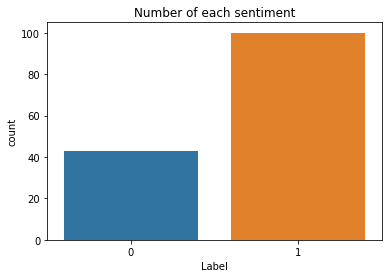

In [38]:
#plot categories 
sns.countplot(data['هل مشروعك'])
plt.xlabel('Label')
plt.title('Number of each sentiment')
print('-------------------------------')
print(data['هل مشروعك'].value_counts())
print('-------------------------------')

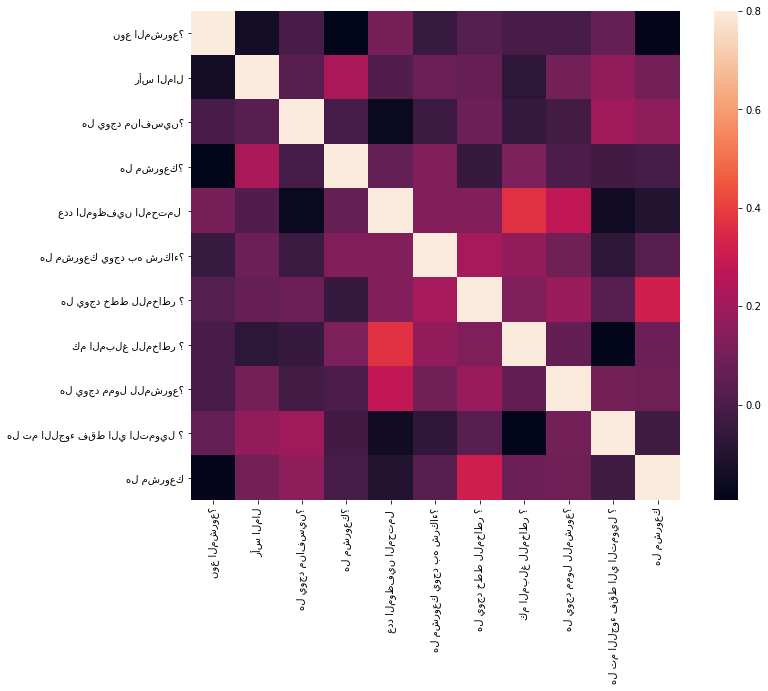

In [39]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# split data

In [40]:
#split the the target and the features 
X = data.drop('هل مشروعك',axis = 1 )
X =X.drop("نوع المشروع؟",axis = 1 )
Y = data['هل مشروعك']
X

,رأس المال,هل يوجد منافسين؟,هل مشروعك؟,عدد الموظفين المحتمل,هل مشروعك يوجد به شركاء؟,هل يوجد خطط للمخاطر ؟,كم المبلغ للمخاطر ؟,هل يوجد ممول للمشروع؟,هل تم اللجوء فقط الي التمويل ؟
0,0,1,1,0,1,0,1,0,0
1,0,1,1,0,0,0,1,1,1
2,0,1,1,2,0,1,2,1,0
3,0,1,1,1,1,1,0,1,1
4,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
138,0,0,1,0,1,0,1,0,0
139,2,1,1,0,1,0,1,1,0
140,0,1,0,0,0,0,1,0,0
141,0,1,1,0,1,1,1,1,1


In [41]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (100, 9)
X_test shape is  (43, 9)
y_train shape is  (100,)
y_test shape is  (43,)


# Building Model

# Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=10).fit(X_train, y_train)

#Calculating Details
print('Logistic Regression Model Train Score is : ' ,clf1.score(X_train, y_train))
print('Logistic Regression Model Test Score is : ' , clf1.score(X_test, y_test))

Logistic Regression Model Train Score is :  0.76
Logistic Regression Model Test Score is :  0.6744186046511628


In [43]:
#Calculating Prediction
y_pred1 = clf1.predict(X_test)
y_pred1_prob = clf1.predict_proba(X_test)
print('Predicted Value for Logistic RegressionModel is : ' , y_pred1[1])
print('Prediction Probabilities Value for Logistic RegressionrModel is : ' , y_pred1_prob[1])

Predicted Value for Logistic RegressionModel is :  0
Prediction Probabilities Value for Logistic RegressionrModel is :  [0.72756266 0.27243734]


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.6744186046511628
[[ 2 13]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.67      0.13      0.22        15
           1       0.68      0.96      0.79        28

    accuracy                           0.67        43
   macro avg       0.67      0.55      0.51        43
weighted avg       0.67      0.67      0.59        43



In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1, X, Y, cv=5)
print(scores)


[0.62068966 0.68965517 0.62068966 0.78571429 0.64285714]


# Support Victor Machine Model

In [46]:
from sklearn import svm
clf2 = svm.SVC()
clf2.fit(X_train, y_train)
#Calculating Details
print('Support Victor Machine Model Train Score is : ' ,clf2.score(X_train, y_train))
print('Support Victor Machine Test Score is : ' , clf2.score(X_test, y_test))
y_pred2 = clf2.predict(X_test)

Support Victor Machine Model Train Score is :  0.79
Support Victor Machine Test Score is :  0.6511627906976745


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.6511627906976745
[[ 0 15]
 [ 0 28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.65      1.00      0.79        28

    accuracy                           0.65        43
   macro avg       0.33      0.50      0.39        43
weighted avg       0.42      0.65      0.51        43



C:\Users\ACA-Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf2, X, Y, cv=5)
print(scores)

[0.62068966 0.72413793 0.5862069  0.71428571 0.64285714]


# RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifier Train Score is : ' ,clf3.score(X_train, y_train))
print('RandomForestClassifier Test Score is : ' , clf3.score(X_test, y_test))

RandomForestClassifier Train Score is :  0.73
RandomForestClassifier Test Score is :  0.6744186046511628


In [50]:
#Calculating Prediction
y_pred3 = clf3.predict(X_test)
y_pred2_prob = clf3.predict_proba(X_test)
print('Predicted Value for RandomForestClassifier Model is : ' , y_pred2[:1])
print('Prediction Probabilities Value for RandomForestClassifier Model is : ' , y_pred2_prob[:1])

Predicted Value for RandomForestClassifier Model is :  [1]
Prediction Probabilities Value for RandomForestClassifier Model is :  [[0.23980045 0.76019955]]


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.6744186046511628
[[ 1 14]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.67      1.00      0.80        28

    accuracy                           0.67        43
   macro avg       0.83      0.53      0.46        43
weighted avg       0.78      0.67      0.56        43



In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf3, X, Y, cv=5)
print(scores)


[0.65517241 0.68965517 0.68965517 0.71428571 0.71428571]


# Save Model

In [53]:
import pickle
filename = 'najah_model.h5'
pickle.dump(clf1, open(filename, 'wb'))